In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import root_mean_squared_error

In [2]:
# load the dataset
data = px.data.tips()
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# seperating the x and y 

X = data.drop(columns = ['tip']).copy()
y = data['tip']

# encode the categorical variables in X
cat_col = ['sex','smoker','day','time']
encoder = LabelEncoder()
for col in cat_col:
    X[col] = encoder.fit_transform(X[col])


# scale the entire features in X
scaler = StandardScaler()
columns = list(X.columns) # get the column names
X = scaler.fit_transform(X)
X = pd.DataFrame(data = X, columns = columns)

X.head()

,total_bill,sex,smoker,day,time,size
0,-0.314711,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,-1.343353,-0.784789,0.279158,-0.621582,1.506958


In [6]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=23)

In [21]:
# train the model

no_depth = list(range(1, 10))
train_test_rmse = {}

for depth in no_depth:

    model = RandomForestRegressor(random_state=23,
                                n_estimators=30, max_depth = depth)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train) # get train prediction
    test_preds = model.predict(X_test) # get test prediction

    # evaluate the model performance
    train_rmse = root_mean_squared_error(y_train, train_preds)
    test_rmse = root_mean_squared_error(y_test, test_preds)
    
    train_test_rmse.update({train_rmse:test_rmse})
    
    print(f'At n_estimator = 30, max_depth: {depth}...Train rmse: {train_rmse}.....Test_rmse: {test_rmse}')

At n_estimator = 30, max_depth: 1...Train rmse: 1.0659140552173725.....Test_rmse: 1.1571148910917834
At n_estimator = 30, max_depth: 2...Train rmse: 0.9349870551111064.....Test_rmse: 1.0171788086975255
At n_estimator = 30, max_depth: 3...Train rmse: 0.8611649437666431.....Test_rmse: 1.0404996707813297
At n_estimator = 30, max_depth: 4...Train rmse: 0.7951444661158821.....Test_rmse: 1.0535821463769888
At n_estimator = 30, max_depth: 5...Train rmse: 0.718807855502031.....Test_rmse: 1.0249475760907472
At n_estimator = 30, max_depth: 6...Train rmse: 0.6436767564997581.....Test_rmse: 1.0178111937306094
At n_estimator = 30, max_depth: 7...Train rmse: 0.5806796167253975.....Test_rmse: 1.0103168813799817
At n_estimator = 30, max_depth: 8...Train rmse: 0.5276710100800655.....Test_rmse: 0.9746665956751261
At n_estimator = 30, max_depth: 9...Train rmse: 0.4962017415385506.....Test_rmse: 0.9773269479345692


2.99827868852459

In [15]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

### RANDOM FOREST (OCT COHORT)

In [6]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_palette('husl')

In [2]:
# load the dataset

X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [8]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=23, stratify=y,
                                                    test_size=0.2)

In [9]:
# setup a function for scaling
scaler = StandardScaler()

def scale_data(data: pd.DataFrame) -> pd.DataFrame:
    columns = data.columns
    scaler.fit(data)
    data = scaler.transform(data)
    data = pd.DataFrame(data = data, columns=list(columns))
    
    return data

# scale X_train
X_train = scale_data(data=X_train)
    

In [26]:
# Train the model 

model = RandomForestClassifier(random_state=23)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

# scale the test set and get prediction
X_test = scale_data(data = X_test) # scale the test set
test_preds = model.predict(X_test) # make test prediction

#### Evaluate Model Performance

In [27]:
print('====Train Classification====')
print(classification_report(y_true=y_train, y_pred=train_preds))
print('====Test Classification====')
print(classification_report(y_true=y_test, y_pred=test_preds))

====Train Classification====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

====Test Classification====
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 1.0, 'Test Confusion Matrix')

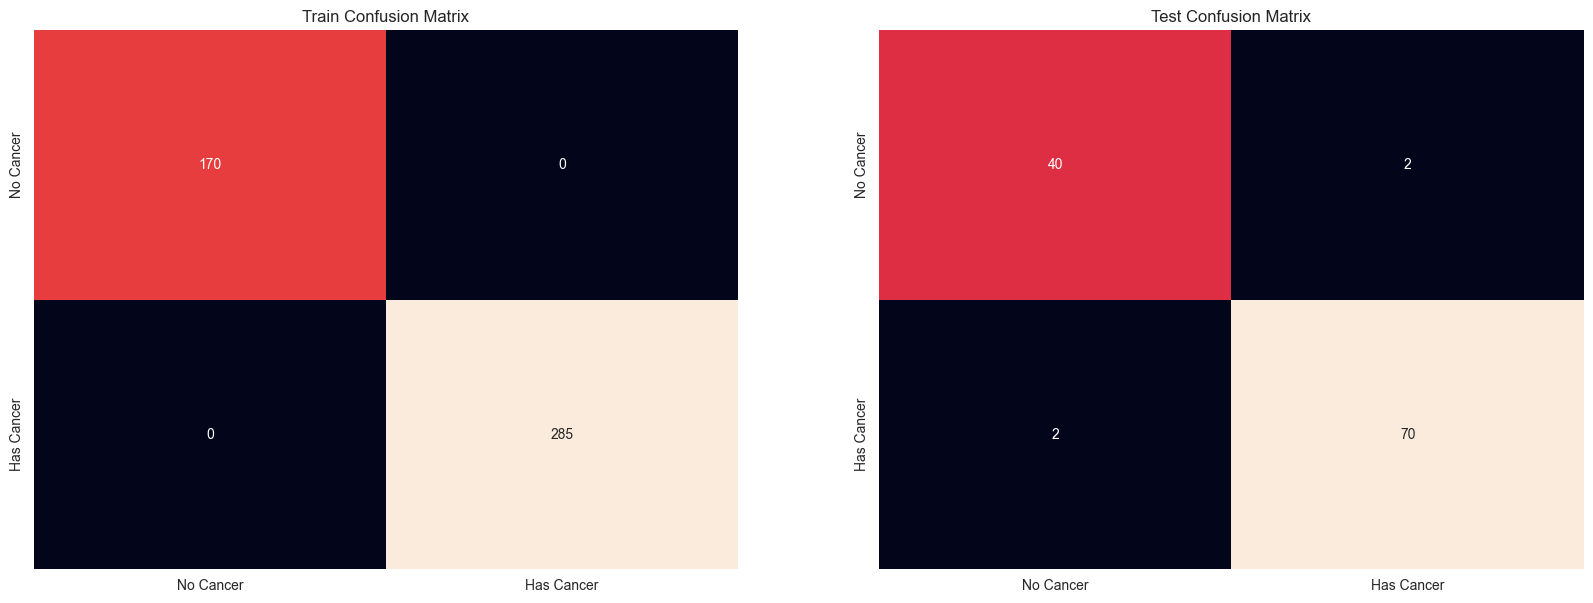

In [30]:
cols = ['No Cancer', 'Has Cancer']
test_conf = confusion_matrix(y_test, test_preds)
test_conf = pd.DataFrame(data=test_conf, columns = cols, index = cols)
train_conf = confusion_matrix(y_train, train_preds)
train_conf = pd.DataFrame(data=train_conf, columns = cols, index = cols)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
sns.heatmap(data=train_conf, annot=True, fmt='d',
            cbar=False, ax=axes[0])
sns.heatmap(data=test_conf, annot=True, fmt='d',
            cbar=False, ax=axes[1])

axes[0].set_title('Train Confusion Matrix')
axes[1].set_title('Test Confusion Matrix')


### RANDOM FOREST REGRESSION

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.datasets import load_diabetes

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# load the data set

X = load_diabetes(as_frame=True)['data']
y = load_diabetes()['target']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state=23)

# train the model
reg_model = RandomForestRegressor(random_state=23)
reg_model.fit(X_train, y_train)
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print(f'train_rmse: {root_mean_squared_error(y_train, train_preds)}')
print(f'test_rmse: {root_mean_squared_error(y_test, test_preds)}')

train_rmse: 21.69429439618726
test_rmse: 59.80016244200251


In [46]:
X_train.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
13,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038394,-0.013504
325,-0.001882,-0.044642,0.054152,-0.066506,0.072732,0.056619,-0.043401,0.084863,0.084492,0.048628
319,0.019913,-0.044642,0.004572,0.045972,-0.018080,-0.054549,0.063367,-0.039493,0.028658,0.061054


In [45]:
train_preds[:5]

array([153.54, 194.47, 203.13, 199.17, 122.75])

In [44]:
y_train[:5]

array([141., 185., 192., 191.,  96.])

In [32]:
import plotly.express as px
data = px.data.tips()

In [33]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

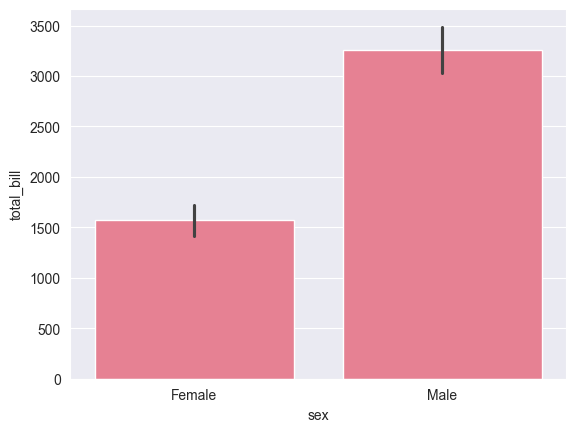

In [38]:
sns.barplot(data=data, x = 'sex', y = 'total_bill',estimator='sum')

<BarContainer object of 2 artists>

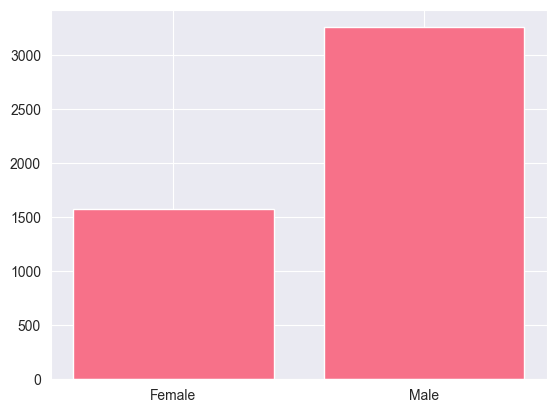

In [39]:
temp_data = data[['sex','total_bill']].groupby(by='sex').sum()
temp_data.reset_index(inplace=True)
plt.bar(x = temp_data['sex'], height = temp_data['total_bill'])